In [232]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
PassengerId = test['PassengerId']
all_data = pd.concat([train,test],ignore_index=True)
print(all_data.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450  


In [233]:
all_data['Title'] = all_data['Name'].apply(lambda x:x.split(",")[1].split(".")[0].strip())

In [234]:
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master', 'Jonkheer'], 'Master'))
all_data['Title'] = all_data['Title'].map(Title_Dict)

In [235]:
all_data[['Title','Survived']].groupby(['Title'],as_index = False).mean().sort_values(by='Survived',ascending=False)


,Title,Survived
3,Mrs,0.795276
5,Royalty,0.750000
1,Miss,0.701087
0,Master,0.560976
4,Officer,0.277778
2,Mr,0.156673


In [236]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [237]:
age_df = all_data[['Age','Pclass','Title']]
age_df = pd.get_dummies(age_df)

In [238]:
known_age = age_df[age_df.Age.notnull()].as_matrix()

In [239]:
unknown_age = age_df[age_df.Age.isnull()].as_matrix()

In [240]:
x=known_age[:,1:]
y = known_age[:,0]

In [241]:
from sklearn.ensemble import RandomForestRegressor

In [242]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(x,y)
predictAges = rfr.predict(unknown_age[:,1:])


In [243]:
all_data.loc[(all_data['Age'].isnull()),'Age']=predictAges
all_data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.531214,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,13.415506,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.398409,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,36.500000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [244]:
all_data['FamilyCount'] = all_data['SibSp']+all_data['Parch']+1
train = all_data.loc[(all_data['Survived'].notnull())]

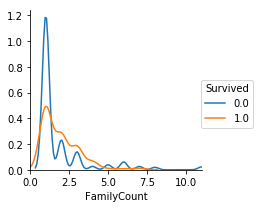

In [245]:
facet = sns.FacetGrid(train,hue='Survived')
facet.map(sns.kdeplot,'FamilyCount')
facet.set(xlim=(0,train['FamilyCount'].max()))
facet.add_legend()

In [246]:
def fam_label(count):
    if count >=2 and count <= 4:
        return 2
    elif (count >4) & (count <=7) | (count ==1):
        return 1
    else:
        return 0
all_data['FamilyLabel'] = all_data['FamilyCount'].apply(fam_label)

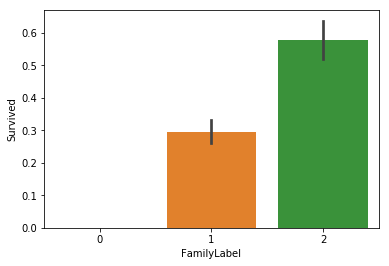

In [247]:
train = all_data.loc[(all_data['Survived'].notnull())]
sns.barplot('FamilyLabel','Survived',data=train)

In [248]:
all_data = all_data.drop(['Parch','SibSp'],axis=1)
all_data.describe()

,Age,Fare,PassengerId,Pclass,Survived,FamilyCount,FamilyLabel
count,1309.000000,1308.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000
mean,29.531214,33.295479,655.000000,2.294882,0.383838,1.883881,1.319328
std,13.415506,51.758668,378.020061,0.837836,0.486592,1.583639,0.496564
min,0.170000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,21.000000,7.895800,328.000000,2.000000,0.000000,1.000000,1.000000
50%,28.398409,14.454200,655.000000,3.000000,0.000000,1.000000,1.000000
75%,36.500000,31.275000,982.000000,3.000000,1.000000,2.000000,2.000000
max,80.000000,512.329200,1309.000000,3.000000,1.000000,11.000000,2.000000


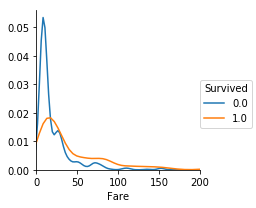

In [249]:
facet = sns.FacetGrid(train,hue='Survived')
facet.map(sns.kdeplot,'Fare')
facet.set(xlim=(0,200))
facet.add_legend()


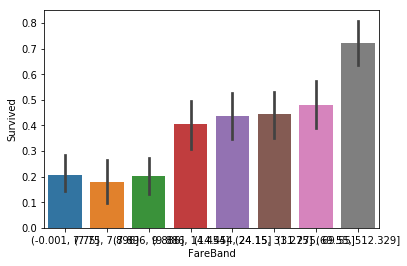

In [250]:
all_data['FareBand'] = pd.qcut(all_data['Fare'],8)
train = all_data.loc[(all_data['Survived'].notnull())]
sns.barplot('FareBand','Survived',data=train)

In [251]:
all_data['FareBand'].value_counts()

(-0.001, 7.75]      210
(31.275, 69.55]     167
(9.886, 14.454]     166
(24.15, 31.275]     164
(14.454, 24.15]     164
(69.55, 512.329]    156
(7.896, 9.886]      154
(7.75, 7.896]       127
Name: FareBand, dtype: int64

In [252]:
def fare_label(fare):
    if fare <=10:
        return 0
    elif fare <=69:
        return 1
    else:
        return 2
all_data['FareLabel'] = all_data['Fare'].apply(fare_label)

In [253]:
all_data.describe()

,Age,Fare,PassengerId,Pclass,Survived,FamilyCount,FamilyLabel,FareLabel
count,1309.000000,1308.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000,1309.000000
mean,29.531214,33.295479,655.000000,2.294882,0.383838,1.883881,1.319328,0.754775
std,13.415506,51.758668,378.020061,0.837836,0.486592,1.583639,0.496564,0.667211
min,0.170000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,328.000000,2.000000,0.000000,1.000000,1.000000,0.000000
50%,28.398409,14.454200,655.000000,3.000000,0.000000,1.000000,1.000000,1.000000
75%,36.500000,31.275000,982.000000,3.000000,1.000000,2.000000,2.000000,1.000000
max,80.000000,512.329200,1309.000000,3.000000,1.000000,11.000000,2.000000,2.000000


In [254]:
all_data = all_data.drop(['Fare'],axis=1)

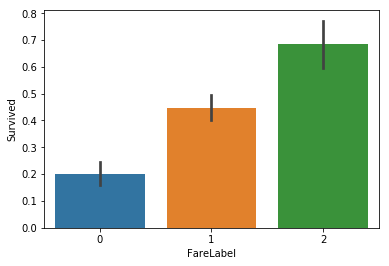

In [255]:
train = all_data.loc[(all_data['Survived'].notnull())]
sns.barplot('FareLabel','Survived',data=train)

In [256]:
all_data['Embarked'].fillna('S')
TicketCount = dict(all_data['Ticket'].value_counts())

In [257]:
all_data['TicketCount'] = all_data['Ticket'].apply(lambda x:TicketCount[x])

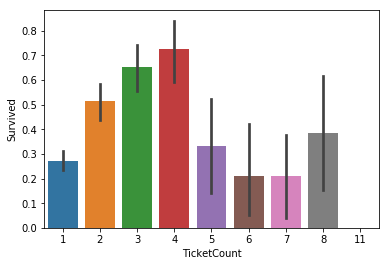

In [258]:
train=all_data.loc[(all_data['Survived'].notnull())]
sns.barplot('TicketCount','Survived',data = train)

In [259]:
def ticket_label(count):
    if (count >= 2) & (count <= 4):
        return 2
    elif ((count > 4) & (count <= 8)) | (count == 1):
        return 1
    elif (count > 8):
        return 0
all_data['TicketLabel'] = all_data['TicketCount'].apply(ticket_label)

In [261]:
all_data.describe()

,Age,PassengerId,Pclass,Survived,FamilyCount,FamilyLabel,FareLabel,TicketLabel
count,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.531214,655.000000,2.294882,0.383838,1.883881,1.319328,0.754775,1.354469
std,13.415506,378.020061,0.837836,0.486592,1.583639,0.496564,0.667211,0.495798
min,0.170000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,21.000000,328.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,28.398409,655.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,36.500000,982.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000
max,80.000000,1309.000000,3.000000,1.000000,11.000000,2.000000,2.000000,2.000000


(26.78, 40.085]     354
(13.475, 26.78]     283
(40.085, 53.39]     129
(0.0902, 13.475]     75
(53.39, 66.695]      43
(66.695, 80.0]        7
Name: AgeBand, dtype: int64

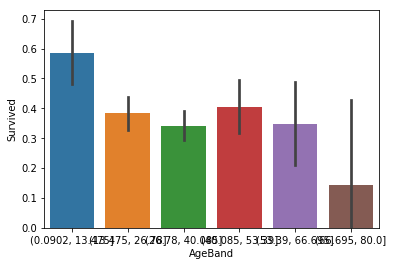

In [262]:
all_data['AgeBand'] = pd.cut(all_data['Age'],6)
train = all_data.loc[(all_data['Survived'].notnull())]
sns.barplot('AgeBand','Survived',data=train)
train['AgeBand'].value_counts()

In [263]:
def age_band(age):
    if age<= 10:
        return 0
    elif age<=60:
        return 1
    else:
        return 2
    
all_data['AgeLabel'] = all_data['Age'].apply(age_band)

In [265]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
Cabin          295 non-null object
Embarked       1307 non-null object
Name           1309 non-null object
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
Survived       891 non-null float64
Title          1309 non-null object
FamilyCount    1309 non-null int64
FamilyLabel    1309 non-null int64
FareBand       1308 non-null category
FareLabel      1309 non-null int64
TicketLabel    1309 non-null int64
AgeLabel       1309 non-null int64
dtypes: category(1), float64(1), int64(7), object(5)
memory usage: 134.4+ KB


In [266]:
all_data['Embarked'] = all_data['Embarked'].fillna('S')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
Cabin          295 non-null object
Embarked       1309 non-null object
Name           1309 non-null object
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
Survived       891 non-null float64
Title          1309 non-null object
FamilyCount    1309 non-null int64
FamilyLabel    1309 non-null int64
FareBand       1308 non-null category
FareLabel      1309 non-null int64
TicketLabel    1309 non-null int64
AgeLabel       1309 non-null int64
dtypes: category(1), float64(1), int64(7), object(5)
memory usage: 134.4+ KB


In [267]:
all_data = pd.get_dummies(all_data)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Columns: 1520 entries, PassengerId to FareBand_(69.55, 512.329]
dtypes: float64(1), int64(7), uint8(1512)
memory usage: 2.0 MB


In [268]:
all_data.head()

,PassengerId,Pclass,Survived,FamilyCount,FamilyLabel,FareLabel,TicketLabel,AgeLabel,Cabin_A10,Cabin_A11,...,Title_Officer,Title_Royalty,"FareBand_(-0.001, 7.75]","FareBand_(7.75, 7.896]","FareBand_(7.896, 9.886]","FareBand_(9.886, 14.454]","FareBand_(14.454, 24.15]","FareBand_(24.15, 31.275]","FareBand_(31.275, 69.55]","FareBand_(69.55, 512.329]"
0,1,3,0.0,2,2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,1,1.0,2,2,2,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,3,1.0,1,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1,1.0,2,2,1,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,3,0.0,1,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [273]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Columns: 1520 entries, PassengerId to FareBand_(69.55, 512.329]
dtypes: float64(1), int64(7), uint8(1512)
memory usage: 2.0 MB
